In this tutorial we are going to look about

- Logistic Regression(Multiclass Classification)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
#sklearn.datasets has some predefined readymade datasets that we can use to learn machine learning

In [14]:
digits = load_digits()
# to load my training set basically

In [15]:
# let's explore what this training set contains
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [16]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

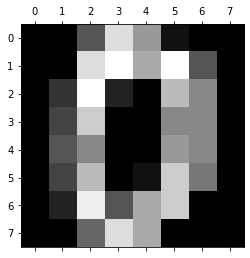

In [19]:
plt.gray()
plt.matshow(digits.images[0])
# we can print the corresponding image

<Figure size 432x288 with 0 Axes>

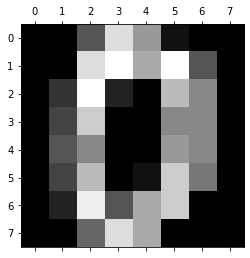

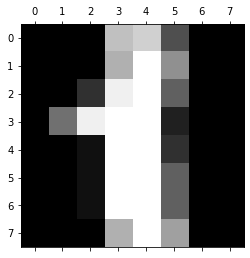

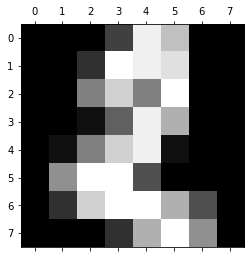

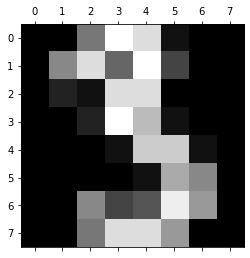

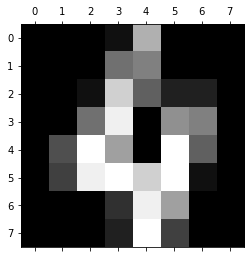

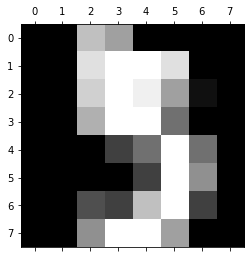

In [20]:
# let's print 1st five samples
plt.gray()
for i in range(6):
    plt.matshow(digits.images[i])

In [22]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [25]:
# before training our model we import train_test_split
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [28]:
len(x_train)

1437

In [29]:
len(x_test)

360

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# always create a model object so that we can train it later

In [33]:
# we can do training by calling a fit method

In [35]:
model.fit(x_train, y_train)

C:\Users\ezhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model.score(x_test, y_test)
# it shows 96.67% which is really good
# let's predict now

0.9666666666666667

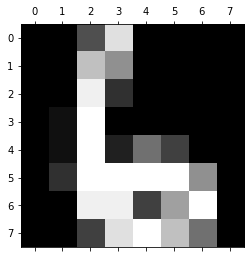

In [38]:
plt.matshow(digits.images[67])

In [39]:
digits.target[67]

6

In [41]:
model.predict([digits.data[67]])

array([6])

In [45]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [47]:
# accuracy is 96.67, we need to know, where it didn't do well, exactly failed, to get the feeling of model's accuracy
# to do that we need confusion matrix

In [53]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

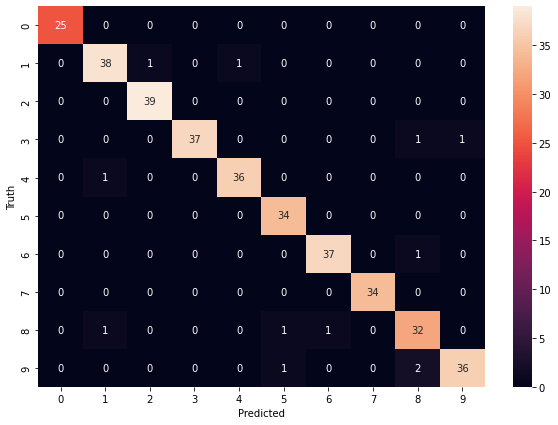

In [54]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')